Lecture: AI I - Basics 

Previous:
[**Chapter 3.2: Pandas**](../03_data/03_matplotlib.ipynb)

---

# Chapter 3.3: Visualisation with Matplotlib

- [](#)

## Matplotlib

[Matplotlib](https://matplotlib.org/stable/users/index.html) is the most widely used Python library for creating static, animated, and interactive visualizations. It provides a flexible plotting system inspired by MATLAB, allowing you to generate simple line charts as well as highly customized scientific figures. Many higher-level libraries, such as seaborn and pandas plotting, are built on top of Matplotlib, making it the cornerstone of the Python visualization ecosystem.

## Gallery

following the link below to explore a wide range of examples showcasing the capabilities of Matplotlib:

In [3]:
from IPython.display import IFrame

IFrame(
    "https://matplotlib.org/stable/gallery/index",
    width="100%",
    height=750,
)

## Jupyter Backend

In Jupyter Notebooks, the special command `%matplotlib inline` is a magic function that changes how Matplotlib displays plots. Instead of opening plots in a separate interactive window, this directive makes sure that all plots are rendered directly inside the notebook cells.

In [4]:
%matplotlib inline

## Import Convention

When working with Matplotlib, the widely accepted convention is to import the `pyplot` [module](https://matplotlib.org/stable/api/pyplot_summary.html) under the alias `plt`:

```python
import matplotlib.pyplot as plt
```

In [5]:
import matplotlib.pyplot as plt

## Plot Structure

A typical Matplotlib plot consists of the following components:
* **Figure**: The entire window or page that will contain the plot(s).
* **Subplots and Axes**: Subplots are individual plots within the figure, arranged in a grid. Each subplot contains its own set of axes.
* **Axis**: The area where data is plotted, including the x and y axes.
* **Artists**: The visual elements of the plot, such as lines, markers, and text.
* **Legend and Annotations**: The legend explains the symbols or colors used in the plot, while annotations provide additional context or information about specific points.

### Figure

The [Figure](https://matplotlib.org/stable/api/figure_api.html) is the overall container that holds everything in a plot. Think of it as the “canvas” on which all subplots, axes, and labels are drawn. A single script can create multiple figures, each independent of the others.
`figsize` sets the width and height in inches.

In [ ]:
fig = plt.figure(figsize=(5, 5))

<Figure size 1000x1000 with 0 Axes>

To show the plot we need to call the `.show()` method on the figure object or `plt.show()`.

In [ ]:
fig = plt.figure(figsize=(5, 5))
fig.show()

/tmp/ipykernel_12486/329384174.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 1000x1000 with 0 Axes>

To show an empty figure, we need to add a subplot to it.

/tmp/ipykernel_12486/4084723797.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


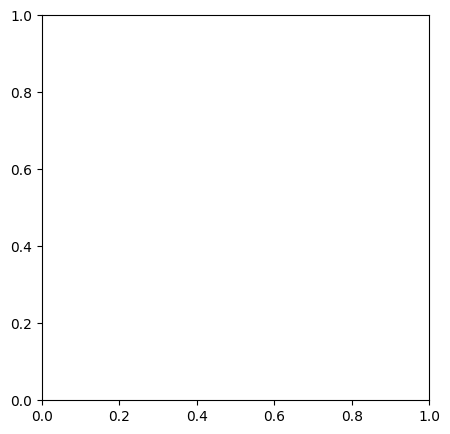

In [23]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
fig.show()

### Subplots and Axes

Inside a figure, you can create subplots, which are grids of smaller plots. Each subplot is represented by an Axes object.
- Axes (plural: Axes) are the actual plots where your data lives.
- Each [Axes](https://matplotlib.org/stable/api/axes_api.html) has its own x-axis, y-axis, and labels.
- The `plt.subplots()` function is the most common way to create them.

> **Note**: We'll take another look at this later.

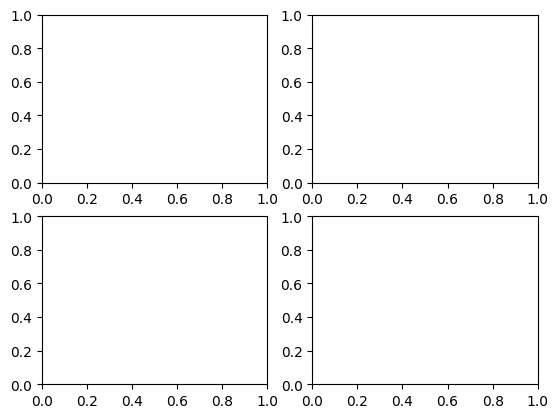

In [24]:
fig, ax = plt.subplots(2, 2)

# Axis

Each [Axes](https://matplotlib.org/stable/api/axis_api.html) object contains an x-axis and a y-axis, which handle:
- Ticks (the small marks along the axis).
- Tick labels (numbers or text along the axis).
- Gridlines (optional).

/tmp/ipykernel_12486/1180968291.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


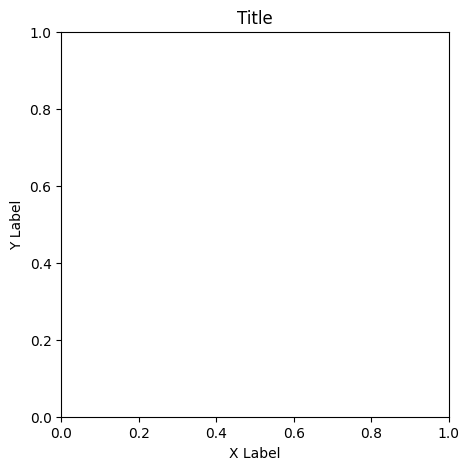

In [25]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_title("Title")
fig.show()

---

Lecture: AI I - Basics 

Exercise: [**Exercise 3.3: Visualisation with Matplotlib**](../03_data/exercises/03_matplotlib.ipynb)

Next: [**Chapter 3.4: Visualisation with Seaborn**]()